In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import cv2
import glob
import numpy as np
data=[]
y=[]
def path_reading(path,k):
  for file in glob.glob(path):
    image_read = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
    images=cv2.resize(image_read,(100,100))
    data.append(images)
    y.append(k)
img_path="/content/drive/MyDrive/Car-Bike-Dataset/Bike/*.*"
path_reading(img_path,1)

img_path="/content/drive/MyDrive/Car-Bike-Dataset/Car/*.*"
path_reading(img_path,0)

data=np.array(data)
y=np.array(y)

print(data,y)

[[[128 228 232 ... 104 100 109]
  [213 234 228 ... 119 105  85]
  [201 229 230 ... 133 111 110]
  ...
  [167 168 169 ... 125 126 127]
  [168 169 170 ... 126 128 130]
  [163 165 165 ... 127 130 127]]

 [[114  82 119 ...  90  85  97]
  [129  89 121 ...  98 101  87]
  [132 121 126 ...  88  96  93]
  ...
  [158 163 167 ... 180 182 179]
  [164 163 155 ... 177 178 177]
  [165 172 165 ... 172 173 176]]

 [[ 90  91  93 ... 121 122 123]
  [ 93  94  96 ... 117 121 124]
  [ 96  97  99 ... 114 120 123]
  ...
  [ 88  59  65 ...  54  48  81]
  [ 33  54  68 ...  80 100 128]
  [ 57  51  61 ...  79  83  97]]

 ...

 [[246 196  50 ... 128 133 137]
  [208  33   0 ... 134 136 138]
  [ 69   0   0 ... 136 135 135]
  ...
  [ 79  78  77 ...  39  39  39]
  [ 78  77  76 ...  39  39  39]
  [ 78  77  75 ...  38  38  38]]

 [[214 215 216 ... 211 217 219]
  [216 217 217 ... 206 207 208]
  [215 216 217 ... 209 207 208]
  ...
  [157 155 153 ... 152 157 158]
  [152 154 155 ... 162 155 156]
  [144 151 157 ... 162 160 1

In [4]:
print(data.shape)
print(y.shape)

(4000, 100, 100)
(4000,)


In [5]:
nsamples, nx, ny = data.shape
x = data.reshape((nsamples,nx*ny))
print(x.shape)

(4000, 10000)


In [6]:
from sklearn.utils import shuffle
x,y=shuffle(x,y)

In [7]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.25, random_state = 0)

In [8]:

#normalizing(to transform features to be o a similar scale) the data-standardscaler
# standardscaler it helps converting all numerical values into the one range
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)#normalizing
xtest = sc_x.transform(xtest)

**Logistic Regression**

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)

In [10]:
model.fit(xtrain, ytrain)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [11]:
y_pred = model.predict(xtest)
y_pred

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix : \n", cm)
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Confusion Matrix : 
 [[400 122]
 [144 334]]
Accuracy :  0.734


In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75       522
           1       0.73      0.70      0.72       478

    accuracy                           0.73      1000
   macro avg       0.73      0.73      0.73      1000
weighted avg       0.73      0.73      0.73      1000



**KNN**

In [14]:
from sklearn.neighbors import KNeighborsClassifier
 
knn = KNeighborsClassifier(n_neighbors = 1)
 
knn.fit(xtrain, ytrain)
pred = knn.predict(xtest)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print ("Accuracy : ", accuracy_score(ytest,pred))
print(confusion_matrix(ytest, pred))
print(classification_report(ytest, pred))

Accuracy :  0.719
[[399 123]
 [158 320]]
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       522
           1       0.72      0.67      0.69       478

    accuracy                           0.72      1000
   macro avg       0.72      0.72      0.72      1000
weighted avg       0.72      0.72      0.72      1000



**Desicion Tree**

In [16]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
15
clf_tree.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=4, random_state=1)

[Text(0.5, 0.9, 'x[8147] <= -0.865\ngini = 0.5\nsamples = 3000\nvalue = [1478, 1522]'),
 Text(0.25, 0.7, 'x[8153] <= -0.928\ngini = 0.39\nsamples = 781\nvalue = [574, 207]'),
 Text(0.125, 0.5, 'x[4075] <= -1.289\ngini = 0.269\nsamples = 437\nvalue = [367, 70]'),
 Text(0.0625, 0.3, 'x[5778] <= -0.649\ngini = 0.494\nsamples = 56\nvalue = [31, 25]'),
 Text(0.03125, 0.1, 'gini = 0.368\nsamples = 37\nvalue = [28, 9]'),
 Text(0.09375, 0.1, 'gini = 0.266\nsamples = 19\nvalue = [3, 16]'),
 Text(0.1875, 0.3, 'x[4982] <= 1.502\ngini = 0.208\nsamples = 381\nvalue = [336, 45]'),
 Text(0.15625, 0.1, 'gini = 0.177\nsamples = 367\nvalue = [331, 36]'),
 Text(0.21875, 0.1, 'gini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.375, 0.5, 'x[5047] <= -0.485\ngini = 0.479\nsamples = 344\nvalue = [207, 137]'),
 Text(0.3125, 0.3, 'x[7871] <= 0.113\ngini = 0.475\nsamples = 124\nvalue = [48, 76]'),
 Text(0.28125, 0.1, 'gini = 0.498\nsamples = 87\nvalue = [46, 41]'),
 Text(0.34375, 0.1, 'gini = 0.102\nsamples 

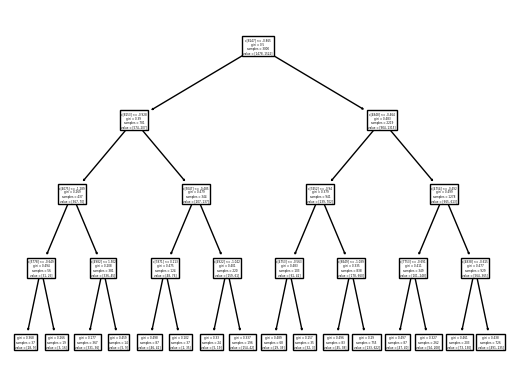

In [17]:
from sklearn import tree
tree.plot_tree(clf_tree)

In [18]:
pre=clf_tree.predict(xtest)

In [19]:
pre

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [20]:
print ("Accuracy : ", accuracy_score(ytest,pre))
print(confusion_matrix(ytest, pre))
print(classification_report(ytest, pre))

Accuracy :  0.674
[[370 152]
 [174 304]]
              precision    recall  f1-score   support

           0       0.68      0.71      0.69       522
           1       0.67      0.64      0.65       478

    accuracy                           0.67      1000
   macro avg       0.67      0.67      0.67      1000
weighted avg       0.67      0.67      0.67      1000



**Support Vector Machine**

In [21]:
from sklearn.svm import SVC
cl = SVC(kernel='linear', probability=True, random_state=42)
cl.fit(xtrain, ytrain)

SVC(kernel='linear', probability=True, random_state=42)

In [22]:
p=cl.predict(xtest)

In [23]:
print ("Accuracy : ", accuracy_score(ytest,p))
print(confusion_matrix(ytest, p))
print(classification_report(ytest, p))

Accuracy :  0.721
[[396 126]
 [153 325]]
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       522
           1       0.72      0.68      0.70       478

    accuracy                           0.72      1000
   macro avg       0.72      0.72      0.72      1000
weighted avg       0.72      0.72      0.72      1000



**Random Forest**

In [24]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier()
regressor.fit(xtrain, ytrain)

RandomForestClassifier()

In [25]:
dn=regressor.predict(xtest)

In [26]:
dn

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,

In [27]:
print ("Accuracy : ", accuracy_score(ytest,dn))
print(confusion_matrix(ytest, dn))
print(classification_report(ytest, dn))

Accuracy :  0.826
[[447  75]
 [ 99 379]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       522
           1       0.83      0.79      0.81       478

    accuracy                           0.83      1000
   macro avg       0.83      0.82      0.83      1000
weighted avg       0.83      0.83      0.83      1000



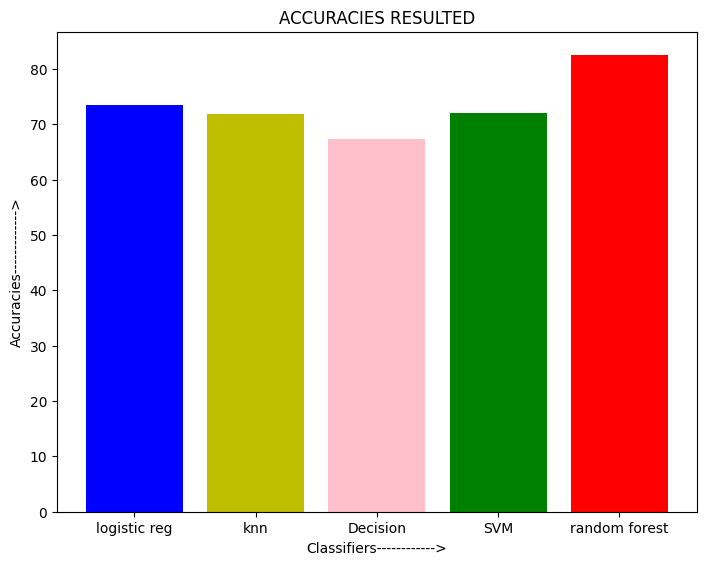

In [28]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

algo = ['logistic reg','knn','Decision','SVM','random forest']

accuracy = [accuracy_score(ytest, y_pred)*100,accuracy_score(ytest,pred)*100,accuracy_score(ytest,pre)*100,accuracy_score(ytest,p)*100,accuracy_score(ytest,dn)*100]

ax.bar(algo[0],accuracy[0],color = 'b')

ax.bar(algo[1],accuracy[1],color = 'y')

ax.bar(algo[2],accuracy[2],color = 'pink')


ax.bar(algo[3],accuracy[3],color = 'green')

ax.bar(algo[4],accuracy[4],color = 'r')

plt.xlabel('Classifiers------------>')

plt.ylabel('Accuracies------------->')

plt.title('ACCURACIES RESULTED')

plt.show()